<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Mean-Absolute-Errors" data-toc-modified-id="Mean-Absolute-Errors-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Mean Absolute Errors</a></span></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span></li><li><span><a href="#3.-GridSearchCV" data-toc-modified-id="3.-GridSearchCV-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3. GridSearchCV</a></span></li><li><span><a href="#Ensemble-Kernel-Ridge-Regression" data-toc-modified-id="Ensemble-Kernel-Ridge-Regression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Ensemble Kernel Ridge Regression</a></span></li></ul></div>

# Regression - Assignment 2

Data and Package Import

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pylab as plt

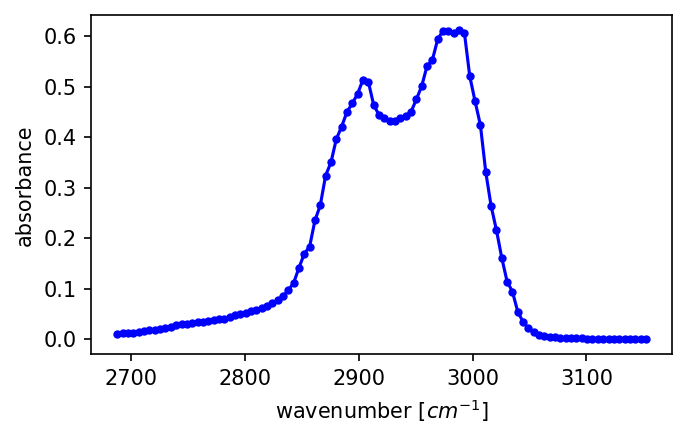

In [2]:
df = pd.read_csv('data/ethanol_IR.csv')
x_all = df['wavenumber [cm^-1]'].values
y_all = df['absorbance'].values

x_peak = x_all[475:575]
y_peak = y_all[475:575]

fig, ax = plt.subplots(figsize = (5, 3), dpi = 150)
ax.plot(x_peak, y_peak, '-b', marker = '.')
ax.set_xlabel('wavenumber [$cm^{-1}$]')
ax.set_ylabel('absorbance');

## Mean Absolute Errors

**Write a function that computes the mean absolute error (MAE).**

In [ ]:
def MAE(actual, prediction):
    
    return mae

**Use 8-fold cross-validation to compute the average and standard deviation of the MAE on the spectra dataset.**

Use a `LinearRegression` model and an `rbf` kernel with $\sigma$=100.

Make sure to pass `shuffle = True` argument when you make a `KFold` object.

**Determine the optimum $\sigma$ that results in the lowest mean of MAE based on 8-fold cross validation.**

Vary the width of an `rbf` kernel with $\sigma$ = [1, 10, 50, 100, 150].

In [ ]:
sigmas = [1, 10, 50, 100, 150]

## Hyperparameter Tuning

**Reshape `x_peak` and `y_peak` into 2D arrayx.**

**Do a train/test split with `test_size=0.3` for the spectra data.**

**Use a `for` loop to determine the optimum regularization strength $\alpha$ of a KRR model.**

Use an `rbf` kernel with $\sigma$=20.

Determine the optimum value of $\alpha$ out of [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1].

In [ ]:
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]

## 3. GridSearchCV

**Import a LASSO model.**

**Shuffle the `x_peak` and `y_peak`.**

You can get a shuffled array when you run `x_shuffle, y_shuffle = shuffle(x, y)`.

The reason why we shuffle the data is that `GridSearchCV` does not have an option to shuffle the input data. Note that we automatically shuffled the data using the `shuffle=True` argument in the `Kfold` function.

In [ ]:
from sklearn.utils import shuffle

**Build a `GridSearchCV` model that optimizes the hyperparameters of a LASSO model for the spectra data.**

Search over $\alpha \in$ [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1] and $\sigma \in$ [5, 10, 15, 20, 25, 30, 35, 40].

Use 3-fold cross-validation.

*Hint: You will need to use a `for` loop over $\sigma$ values. Unlike KRR, LASSO models do not take `gamma` or `sigma` as a parameter. Therefore, you have to make an `rbf` kernel manually and input it to a LASSO model.*

Obtain the optimum $\alpha$ and the best score for each $\sigma$ value. Use `GridSearchCV.best_score_` as an accuracy metric.

**What is the optimum $\sigma$ and $\alpha$?**

**Optional Task**

**Check what happens if the input data is not shuffled before the `GridSearchCV`.**

## Ensemble Kernel Ridge Regression

In this problem you will combine ideas from k-fold cross-validation and bootstrapping with KRR to create an **ensemble** of KRR models.

**Reshape `x_peak` and `y_peak` into 2D array.**

**Use 5-fold cross-validation with the spectra data to construct a series of 5 KRR models with a `rbf` kernel with $\gamma$=0.0005 and $\alpha$=0.01.**

Each model will be trained with 80% of the data, but the exact training points will vary each time so the models will also vary.

You can use all of the data points in the `x_peak` for generating the predictions (in other words, predict on both the training and testing data).

**Plot the resulting ensemble of models along with the original data.**

The plot should consists of 6 different lines (1 from the original data and 5 from each of the slightly different KRR models).

**Plot the standard deviation of the 5 KRR model predictions as a function of wavenumber.**

**Is the predicted error homoscedastic? Briefly explain.**